In [19]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import timeline_drawer
from datetime import datetime
import time
# transpile
from qiskit.transpiler import InstructionDurations, PassManager
from qiskit.transpiler.passes import DynamicalDecoupling, Unroller, ALAPSchedule, LookaheadSwap, BasicSwap
#RB
import numpy as np
from qiskit_experiments.library import randomized_benchmarking as rb
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
from qiskit_experiments.library.randomized_benchmarking import RBUtils

#local로 안받으려고 바꿈.
from rb_experiment_dd import StandardRB_dd

from qiskit_experiments.library import StandardRB, InterleavedRB
import qiskit.circuit.library as circuits
from qiskit.circuit import Delay, Instruction
from qiskit.circuit.library.standard_gates import RXXGate, RZZGate, RZXGate, XGate, SXGate, IGate, CCXGate, SGate, CXGate, YGate,RZGate
#from qiskit_experiments.library.randomized_benchmarking.double_interleaved_rb_experiment import DoubleI

In [2]:
IBMQ.load_account()
IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-education', group='ibm-quantum-1', project='quantum-hackatho')>,
 <AccountProvider for IBMQ(hub='ibm-q-skku', group='snu', project='snu-students')>]

In [3]:
#from qiskit import IBMQ
#IBMQ.save_account(token='1fa943879509be3fdff89e627f421e2db0f3dd381d3858e3fa173593ebd3d8a7ebe9be59de6f11f769897a25d32fcf3fe4cc0f3568d8565d9214773d6e1757b9', hub='ibm-q-skku', group='snu', project='snu-students', overwrite=True)
#provider=IBMQ.enable_account(<1fa943879509be3fdff89e627f421e2db0f3dd381d3858e3fa173593ebd3d8a7ebe9be59de6f11f769897a25d32fcf3fe4cc0f3568d8565d9214773d6e1757b9>)

In [13]:
provider=IBMQ.providers()[2]
backend=provider.get_backend('ibmq_oslo')
properties=backend.properties()


#provider=IBMQ.providers()[2]
#provider = IBMQ.get_provider(hub='ibm-q-community', group='qamp', project='spring-22-17')
#backend=provider.backend.ibmq_lima
#backend = provider.get_backend('ibmq_lima')

# get the basic feautures including qubit number of the backend.
config = backend.configuration()
backend_job_limit=backend.job_limit()

print("{0} is on version {1}. It has {2} qubit{3}. It "
      "{4} OpenPulse programs. The basis gates supported on this device are {5}.{6} are the list of connected qubits."
      "{7} can handle maximum {8} circuits(experiments) per job."
      "Maximum number of active job i can have on it (cocurrent jobs that a user is able to submit to a backend) is {9}."
      "".format(config.backend_name,
                config.backend_version,
                config.n_qubits,
                '' if config.n_qubits == 1 else 's',
                'supports' if config.open_pulse else 'does not support',
                config.basis_gates,
                config.coupling_map,
               config.backend_name,
               config.max_experiments,
               backend_job_limit.maximum_jobs))

QiskitBackendNotFoundError: 'No backend matches the criteria'

ibmq_jakarta
2022-06-27 20:32:50.743747


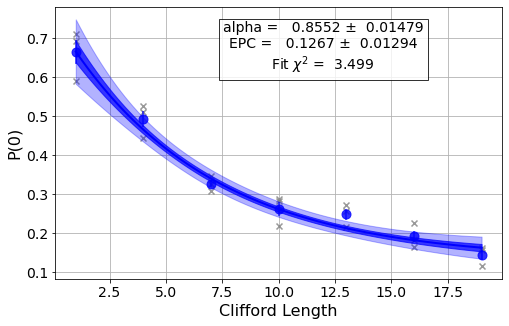

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6249821502296322, 0.855181503162805, 0.13095358575039606]
- χ²: 3.498819035216221
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.855+/-0.015
- χ²: 3.498819035216221
- quality: bad
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.127+/-0.013
- χ²: 3.498819035216221
- quality: bad
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


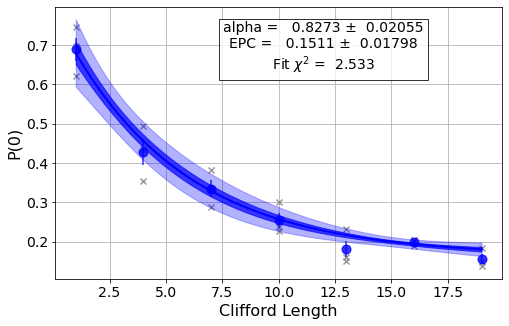

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6237525447325767, 0.8273326143347253, 0.1635587394469612]
- χ²: 2.532625488759578
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.827+/-0.021
- χ²: 2.532625488759578
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.151+/-0.018
- χ²: 2.532625488759578
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


In [6]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [0,1,2]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

ibmq_jakarta
2022-06-27 20:36:37.733126


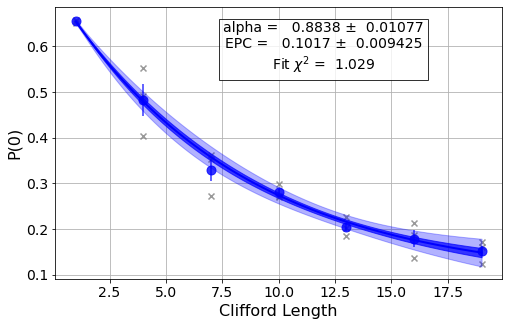

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6421857700963922, 0.8837547924169586, 0.08675823781158991]
- χ²: 1.0292912463850672
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.884+/-0.011
- χ²: 1.0292912463850672
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.102+/-0.009
- χ²: 1.0292912463850672
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


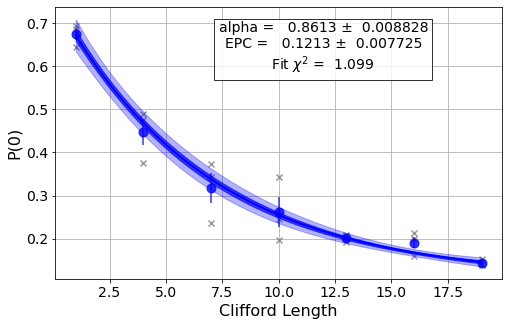

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6542468688588189, 0.8613158390063539, 0.10798375981057078]
- χ²: 1.098687941034897
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.861+/-0.009
- χ²: 1.098687941034897
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.121+/-0.008
- χ²: 1.098687941034897
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


In [7]:

lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [0,1,2]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)




ibmq_jakarta
2022-06-27 21:00:59.270128


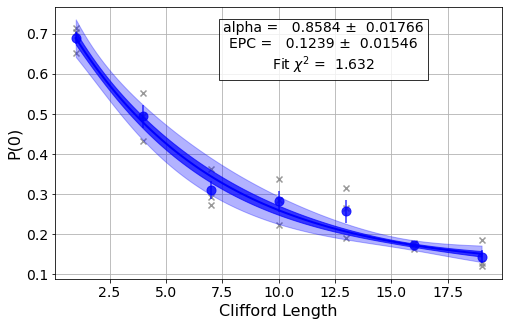

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6688027034094562, 0.8584395084577522, 0.11459345456246085]
- χ²: 1.6323964777731974
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.858+/-0.018
- χ²: 1.6323964777731974
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.124+/-0.015
- χ²: 1.6323964777731974
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


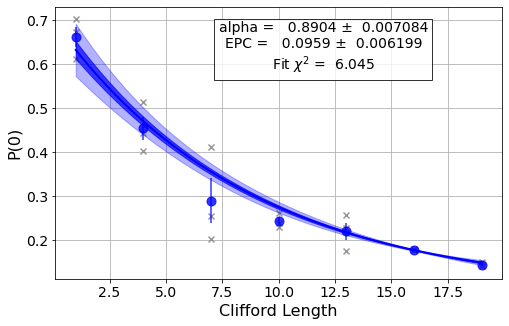

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6200465853049554, 0.8903969250051984, 0.08085211839296534]
- χ²: 6.045196925747501
- quality: bad
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.890+/-0.007
- χ²: 6.045196925747501
- quality: bad
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.096+/-0.006
- χ²: 6.045196925747501
- quality: bad
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


In [11]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [0,1,2]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)


ibmq_jakarta
2022-06-27 21:21:44.150499


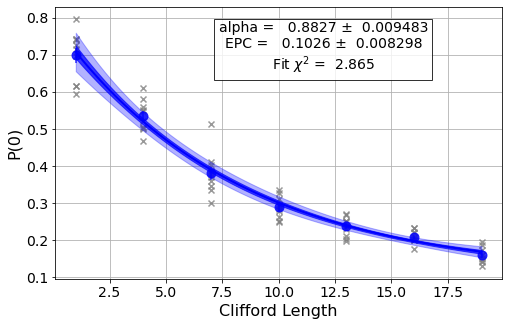

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6826966398245433, 0.8827220101594625, 0.10461843093591057]
- χ²: 2.8647484861512544
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.883+/-0.009
- χ²: 2.8647484861512544
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.103+/-0.008
- χ²: 2.8647484861512544
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


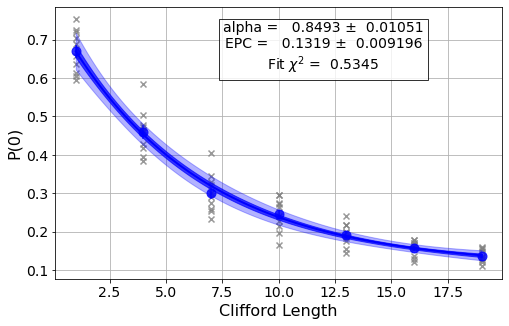

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6605191637204212, 0.8492535853437837, 0.10883554269596618]
- χ²: 0.5345369312278226
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.849+/-0.011
- χ²: 0.5345369312278226
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.132+/-0.009
- χ²: 0.5345369312278226
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


In [14]:
lengths = np.arange(1, 20, 3)
num_samples = 10
seed = 1010
qubits = [0,1,2]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)


ibmq_jakarta
2022-06-27 22:26:04.983825


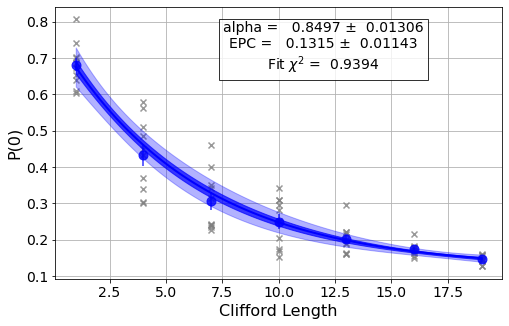

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6535574935797398, 0.849747637347987, 0.11950456487513533]
- χ²: 0.9393821354227059
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q3']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.850+/-0.013
- χ²: 0.9393821354227059
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q3']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.131+/-0.011
- χ²: 0.9393821354227059
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q3']
- verified: False


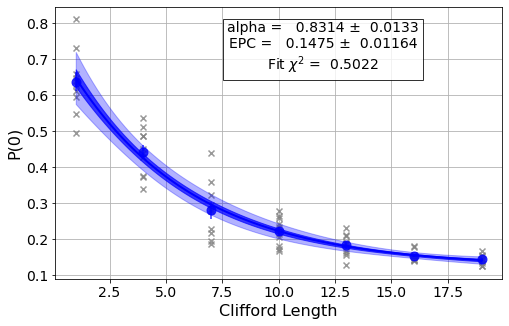

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6317667485370485, 0.8313882386092561, 0.1231741454265453]
- χ²: 0.5022121792634089
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q3']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.831+/-0.013
- χ²: 0.5022121792634089
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q3']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.148+/-0.012
- χ²: 0.5022121792634089
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q3']
- verified: False


In [15]:
lengths = np.arange(1, 20, 3)
num_samples = 10
seed = 1010
qubits = [0,1,3]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

ibmq_jakarta
2022-06-27 23:08:17.649337


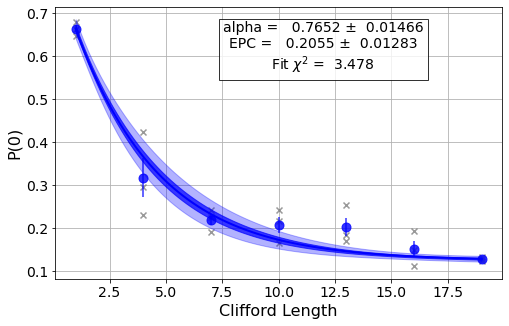

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.703523699714735, 0.7651645878031151, 0.12466319408508106]
- χ²: 3.477730278557439
- quality: bad
- extra: <4 items>
- device_components: ['Q1', 'Q2', 'Q3']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.765+/-0.015
- χ²: 3.477730278557439
- quality: bad
- extra: <1 items>
- device_components: ['Q1', 'Q2', 'Q3']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.205+/-0.013
- χ²: 3.477730278557439
- quality: bad
- extra: <1 items>
- device_components: ['Q1', 'Q2', 'Q3']
- verified: False


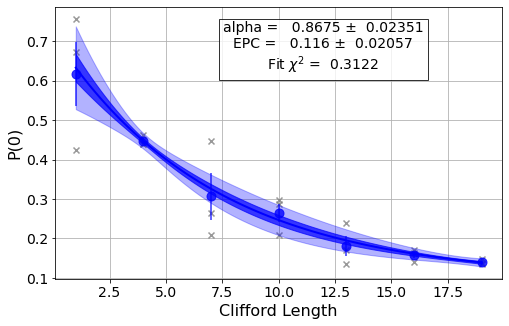

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6170739180632334, 0.8674815774141624, 0.09762045027108725]
- χ²: 0.3122488727985352
- quality: good
- extra: <4 items>
- device_components: ['Q1', 'Q2', 'Q3']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.867+/-0.024
- χ²: 0.3122488727985352
- quality: good
- extra: <1 items>
- device_components: ['Q1', 'Q2', 'Q3']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.116+/-0.021
- χ²: 0.3122488727985352
- quality: good
- extra: <1 items>
- device_components: ['Q1', 'Q2', 'Q3']
- verified: False


In [32]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [1,2,3]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

ibmq_jakarta
2022-06-27 23:11:14.588403


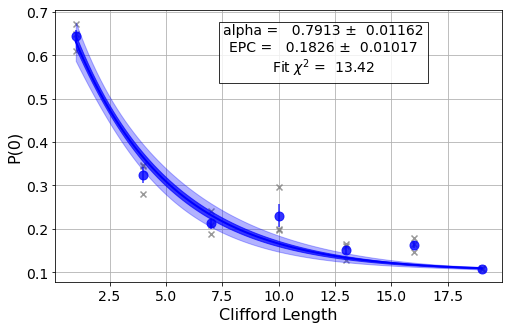

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6696926891312728, 0.791303973677106, 0.10151507034932263]
- χ²: 13.41941815193945
- quality: bad
- extra: <4 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.791+/-0.012
- χ²: 13.41941815193945
- quality: bad
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.183+/-0.010
- χ²: 13.41941815193945
- quality: bad
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False


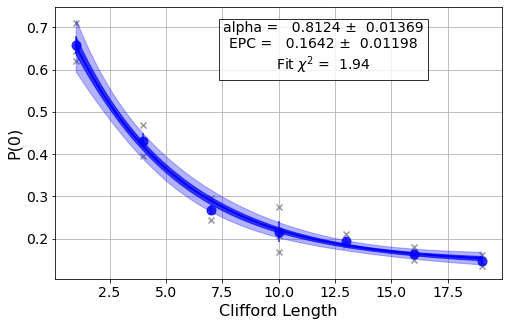

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6344333157455528, 0.8123580903061403, 0.14152134338189756]
- χ²: 1.9400363875561695
- quality: good
- extra: <4 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.812+/-0.014
- χ²: 1.9400363875561695
- quality: good
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.164+/-0.012
- χ²: 1.9400363875561695
- quality: good
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False


In [33]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [1,3,5]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

ibmq_jakarta
2022-06-27 23:13:44.463840


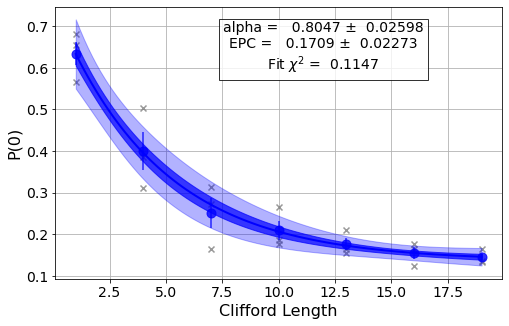

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6174727546093314, 0.804667137476038, 0.1364684291303874]
- χ²: 0.11470524059938032
- quality: good
- extra: <4 items>
- device_components: ['Q3', 'Q4', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.805+/-0.026
- χ²: 0.11470524059938032
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q4', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.171+/-0.023
- χ²: 0.11470524059938032
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q4', 'Q5']
- verified: False


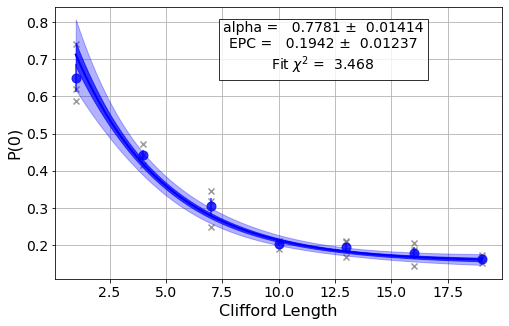

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.7159692613717817, 0.7780519103451947, 0.15539947212706634]
- χ²: 3.4680642351625703
- quality: bad
- extra: <4 items>
- device_components: ['Q3', 'Q4', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.778+/-0.014
- χ²: 3.4680642351625703
- quality: bad
- extra: <1 items>
- device_components: ['Q3', 'Q4', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.194+/-0.012
- χ²: 3.4680642351625703
- quality: bad
- extra: <1 items>
- device_components: ['Q3', 'Q4', 'Q5']
- verified: False


In [34]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [3,4,5]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

ibmq_jakarta
2022-06-27 23:16:08.799224


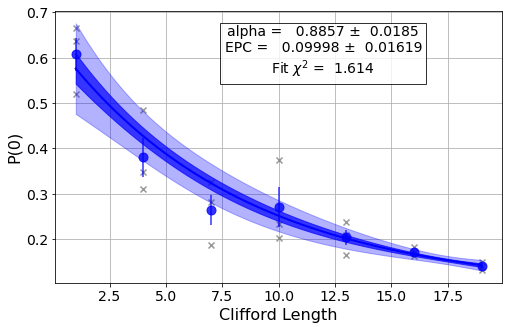

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.5511482769225904, 0.8857363146808923, 0.08763957232456529]
- χ²: 1.613729579981597
- quality: good
- extra: <4 items>
- device_components: ['Q3', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.886+/-0.019
- χ²: 1.613729579981597
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.100+/-0.016
- χ²: 1.613729579981597
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q5', 'Q6']
- verified: False


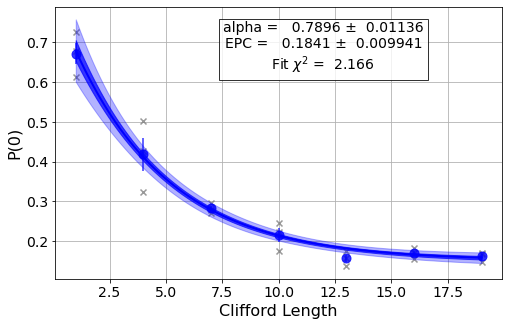

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6703716113262791, 0.7896154546330659, 0.15033470377422248]
- χ²: 2.1662468968253084
- quality: good
- extra: <4 items>
- device_components: ['Q3', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.790+/-0.011
- χ²: 2.1662468968253084
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.184+/-0.010
- χ²: 2.1662468968253084
- quality: good
- extra: <1 items>
- device_components: ['Q3', 'Q5', 'Q6']
- verified: False


In [35]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [3,5,6]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

ibmq_jakarta
2022-06-27 23:18:24.451730


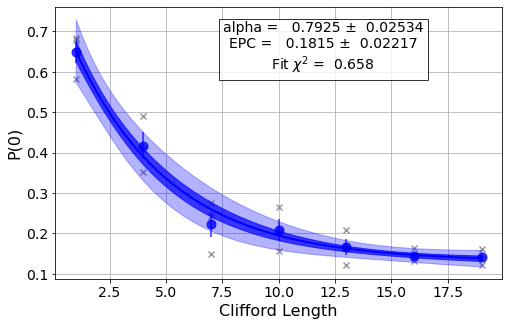

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6574665980627742, 0.7925330281593468, 0.13072896130447575]
- χ²: 0.6579676930526335
- quality: good
- extra: <4 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.793+/-0.025
- χ²: 0.6579676930526335
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.182+/-0.022
- χ²: 0.6579676930526335
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False


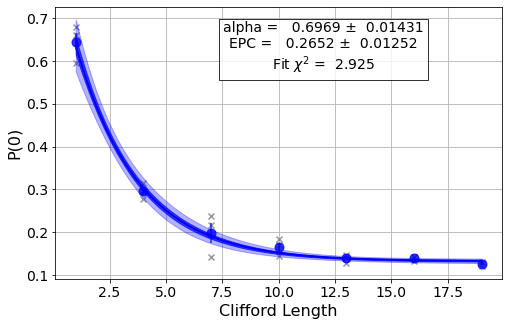

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.7232128391801443, 0.696922795278383, 0.13229974731537728]
- χ²: 2.925169222518403
- quality: good
- extra: <4 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.697+/-0.014
- χ²: 2.925169222518403
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.265+/-0.013
- χ²: 2.925169222518403
- quality: good
- extra: <1 items>
- device_components: ['Q4', 'Q5', 'Q6']
- verified: False


In [36]:
lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [4,5,6]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

ibmq_jakarta
2022-06-27 22:44:27.998174


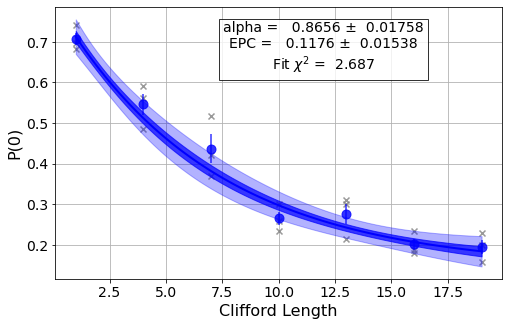

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6598732147739592, 0.8656039084046707, 0.1415214148949126]
- χ²: 2.687409944864802
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.866+/-0.018
- χ²: 2.687409944864802
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.118+/-0.015
- χ²: 2.687409944864802
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


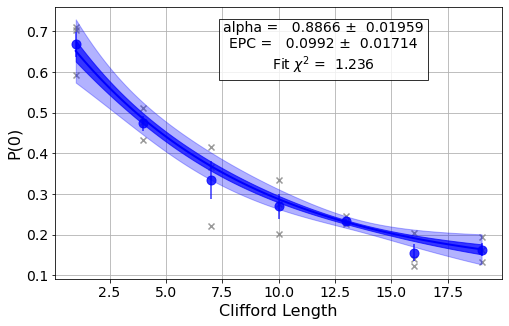

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.6218013544625397, 0.8866299123924751, 0.10076758829810786]
- χ²: 1.2362801240916572
- quality: good
- extra: <4 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.887+/-0.020
- χ²: 1.2362801240916572
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.099+/-0.017
- χ²: 1.2362801240916572
- quality: good
- extra: <1 items>
- device_components: ['Q0', 'Q1', 'Q2']
- verified: False


In [23]:
from math import pi

lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [0,1,2]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),SXGate(),SXGate(),RZGate(pi),XGate(),SXGate(),SXGate(),RZGate(pi)])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

ibmq_jakarta
2022-06-27 22:51:44.499743


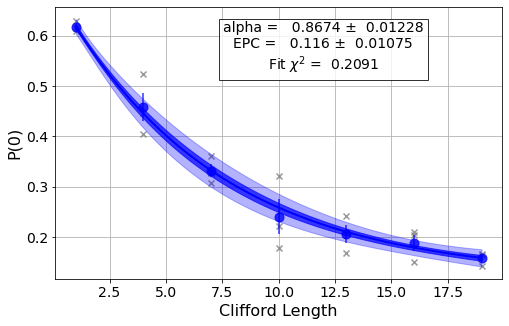

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.5742225922452506, 0.8674196215141293, 0.12000701220124045]
- χ²: 0.20907506054266767
- quality: good
- extra: <4 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.867+/-0.012
- χ²: 0.20907506054266767
- quality: good
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.116+/-0.011
- χ²: 0.20907506054266767
- quality: good
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False


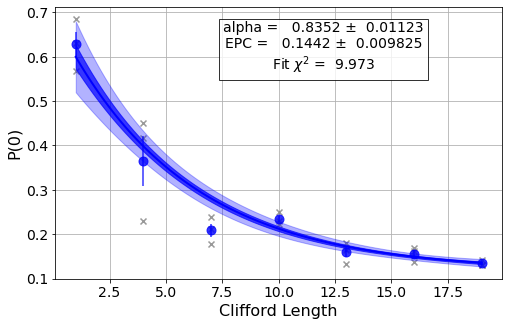

DbAnalysisResultV1
- name: @Parameters_RBAnalysis
- value: [0.5782867429256402, 0.8352170682554662, 0.11672021281904413]
- χ²: 9.9726004467591
- quality: bad
- extra: <4 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: alpha
- value: 0.835+/-0.011
- χ²: 9.9726004467591
- quality: bad
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False
DbAnalysisResultV1
- name: EPC
- value: 0.144+/-0.010
- χ²: 9.9726004467591
- quality: bad
- extra: <1 items>
- device_components: ['Q1', 'Q3', 'Q5']
- verified: False


In [25]:
from math import pi

lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [1,3,5]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),SXGate(),SXGate(),RZGate(pi),XGate(),SXGate(),SXGate(),RZGate(pi)])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

In [31]:
from math import pi

lengths = np.arange(1, 20, 3)
num_samples = 3
seed = 1010
qubits = [1,3,5]
print(backend)
print(datetime.today())

# Run an RB experiment on qubit 0
#exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
exp1 = StandardRB_dd(qubits, lengths, num_samples=num_samples, seed=seed,dd_sequence=[XGate(),RZGate(pi),XGate(),XGate(),RZGate(pi),XGate()])
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
display(expdata1.figure(0))
for result in results1:
    print(result)

exp2=StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata2 = exp2.run(backend).block_for_results()
results2 = expdata2.analysis_results()

# View result data
display(expdata2.figure(0))
for result in results2:
    print(result)

ibmq_jakarta
2022-06-27 22:59:19.806299


TranspilerError: 'The spacings must be given in terms of fractions of the slack period and sum to 1.'